# TP  Evolution de la population des communes françaises 

Bernard Uguen 

Février 2023 

Objectifs du TP 
----------------

+ Utiliser le module pandas et les structures de données qu'il introduit (au dessus de numpy)
    + Séries 
    + DataFrame 
+ Pratiquer pandas sur un cas concret (études des communes françaises)
    + Lecture 
    + Mise en forme, gestion des données invalides
    + Association entre différentes sources de données (merge) 
    + Visualisation (scatter plot)
    
    

#  Etude des Communes Françaises

In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Vous disposez sur moodle d'une archive contenant différents fichiers sélectionnés pour les besoins du TP. 
En particulier: 

+  `commune1.csv`est un fichier qui contient l'évolution démographique de toutes les communes française depuis 1975 ainsi que les coordonnées géographiques (longitude,latitude) de la commune. Ce fichier est volumineux et découpés en 2 archives zip.
+ `commune2.csv`est un fichier d'une autre source qui contient entre autres les codes postaux des communes 
+ `maires-25-04-2014.xslx` contient la liste des maires de France. 
+ `insee.csv` 


Sur la figure ci-dessous chaque point correspond à une commune. 

In [3]:
#Image('communes.png')

## Lecture de fichiers

+ Utiliser les fonctions de lecture dédiées de pandas pour lire les différents jeux de données fournis

+ `pd.read_csv`
+ `pd.io.excel.read_excel`

### <font color="yellow">Lecture des differents jeux de données</font>

In [4]:
df_comm1_1 = pd.read_csv('commune1_part1.csv')
df_comm1_1.rename(columns={'dep': 'Code du departement'}, inplace=True)
df_comm1_1.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,2.142425e+06,2.149205e+06,2.156989e+06,2.165785e+06,2.175600e+06,2.186440e+06,2.198315e+06,2.211230e+06,2.225194e+06,2.240213e+06
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,1.106389e+03,1.126294e+03,1.146224e+03,1.166163e+03,1.186095e+03,1.206006e+03,1.225880e+03,1.245702e+03,1.265455e+03,1.285127e+03
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,8.738642e+02,8.797754e+02,8.849946e+02,8.894883e+02,8.932229e+02,8.961646e+02,8.982798e+02,8.995351e+02,8.998966e+02,8.993365e+02
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,4.408286e+03,4.407891e+03,4.407379e+03,4.407398e+03,4.408599e+03,4.411630e+03,4.417140e+03,4.425779e+03,4.438194e+03,4.454928e+03
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,9.284420e+02,9.278621e+02,9.260636e+02,9.230492e+02,9.188215e+02,9.133832e+02,9.067369e+02,8.988853e+02,8.898310e+02,8.795762e+02


In [5]:
df_comm1_2 = pd.read_csv('commune1_part2.csv')
# nommer les colonnes
df_comm1_2.columns = ['reg', 'Code du departement', 'com', 'article', 'com_nom', 'long', 'lat', 'pop_1975',
       'pop_1976', 'pop_1977', 'pop_1978', 'pop_1979', 'pop_1980', 'pop_1981',
       'pop_1982', 'pop_1983', 'pop_1984', 'pop_1985', 'pop_1986', 'pop_1987',
       'pop_1988', 'pop_1989', 'pop_1990', 'pop_1991', 'pop_1992', 'pop_1993',
       'pop_1994', 'pop_1995', 'pop_1996', 'pop_1997', 'pop_1998', 'pop_1999',
       'pop_2000', 'pop_2001', 'pop_2002', 'pop_2003', 'pop_2004', 'pop_2005',
       'pop_2006', 'pop_2007', 'pop_2008', 'pop_2009', 'pop_2010']
df_comm1_2.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,41,55,464,NaN,SAINT-PIERREVILLERS,5.683704,49.377203,162.509134,159.198180,156.015640,...,133.906559,135.902831,138.184995,140.759107,143.631223,146.807401,150.293698,154.096170,158.220874,162.672857
1,41,55,465,NaN,SAINT-REMY-LA-CALONNE,5.601770,49.046117,43.531399,42.753629,42.190322,...,64.106827,65.292227,66.403061,67.428214,68.356567,69.177006,69.878414,70.449673,70.879669,71.159136
2,41,55,466,NaN,SALMAGNE,5.324271,48.750992,213.527607,225.074464,235.858471,...,319.581267,318.014220,316.221938,314.225099,312.044381,309.700459,307.214013,304.605720,301.896256,299.102854
3,41,55,467,NaN,SAMPIGNY,5.511814,48.825108,679.506845,671.393758,665.775219,...,807.722401,805.521020,801.098462,794.273355,784.864323,772.689993,757.568992,739.319944,717.761476,692.742443
4,41,55,468,NaN,SAMOGNEUX,5.337692,49.254560,40.098169,40.405017,40.614989,...,51.772342,53.958021,56.398634,59.107710,62.098782,65.385380,68.981036,72.899280,77.153644,81.755404


#### <font color="red">Important Commune 2</font>
La taille du fichier commune2.csv est trop grande pour être lue avec la fonction `pd.read_csv`. Nous avons donc importé dask.dataframe qui permet de lire des fichiers volumineux. Apres avoir lu le fichier, nous avons converti le dataframe en pandas dataframe en utilisant la fonction `compute()`.

In [6]:
import dask.dataframe as dd
df_comm2 = dd.read_csv('commune2.csv', encoding = "ISO-8859-1", sep = ';', header = 0, dtype = {'Commune': 'str', 'Codepos': 'str', 'Depard': 'str', 'Departement': 'str', 'INSEE': 'str'})
df_comm2 = df_comm2.compute()
df_comm2.head()

,Commune,Codepos,Departement,INSEE
0,L ABERGEMENT CLEMENCIAT,01400,AIN,1001
1,L ABERGEMENT DE VAREY,01640,AIN,1002
2,AMAREINS,01090,AIN,1003
3,AMBERIEU EN BUGEY,01500,AIN,1004
4,AMBERIEUX EN DOMBES,01330,AIN,1005


In [7]:
df_legislatives = pd.read_csv('legislatives2012.csv', low_memory=False)
df_legislatives.head()
# mettre en majuscule les noms de colonne Libelle du cantons 
df_legislatives['Libelle du Cantons'] = df_legislatives['Libelle du Cantons'].str.upper()
df_legislatives.head()

,Code du departement,Libelle du departement,Code du Canton,Libelle du Cantons,Code de la circonscription,Libelle de la circonscription,Numero du tour,Inscrits,Abstentions,% Abs/Ins,...,% Voix/Ins.21,% Voix/Exp.21,N Panneau.22,Sexe.22,Nom.22,Prenom.22,Nuance.22,Voix.22,% Voix/Ins.22,% Voix/Exp.22
0,1,AIN,1,AMBERIEU-EN-BUGEY,5,5eme circonscription,1,14829,6412,43.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AIN,1,AMBERIEU-EN-BUGEY,5,5eme circonscription,2,14829,6609,44.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,AIN,2,BÂGE-LE-CHÂTEL,4,4eme circonscription,1,11233,4474,39.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,AIN,2,BÂGE-LE-CHÂTEL,4,4eme circonscription,2,11233,4736,42.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,AIN,3,BELLEGARDE-SUR-VALSERINE,3,3eme circonscription,1,10985,5242,47.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### <font color="red">Important : maires</font>
Le fichier maire est au format xlsx. Nous avons donc utilisé la fonction `pd.io.excel.read_excel` pour le lire.
Pour ce faire nous avons du importé le module openpyxl.

In [8]:
import openpyxl
df_mairies = pd.io.excel.read_excel('maires.xlsx', header = 3)
df_mairies.head()

,Code du département (Maire),Libellé de département (Maires),Code Insee de la commune,Libellé de la commune,Population de la commune,Nom de l'élu,Prénom de l'élu,Civilité,Date de naissance,Code profession,Libellé de la profession
0,1,AIN,1,L'Abergement-Clémenciat,780.0,BOULON,Daniel,M,1951-03-04,61.0,Retraités salariés privés
1,1,AIN,2,L'Abergement-de-Varey,234.0,ORSET,Max,M,1947-11-02,65.0,Autres retraités
2,1,AIN,4,Ambérieu-en-Bugey,13839.0,FABRE,Daniel,M,1961-09-07,51.0,Cadres (entreprises publiques)
3,1,AIN,5,Ambérieux-en-Dombes,1600.0,PERNET,Pierre,M,1961-07-29,42.0,Professeurs du secondaire et techn.
4,1,AIN,6,Ambléon,112.0,BIONDA,Annie,Mme,1951-11-28,63.0,Retraités fonct.publique (sf enseig.)


In [9]:
df_location = pd.read_csv('locations.csv')
df_location.head()

,ref,Chargescomprises:,Classeénergie:,Codepostal:,GES:,Loyermensuel:,Meublé/Nonmeublé:,Pièces:,Référence:,Surface:,Typedebien:,Ville:,ref.1
0,710178415,NaN,C (de 91 &agrave; 150),35000,C (de 11 &agrave; 20),300.0,Meublé,2.0,NaN,20 m,Appartement,Rennes,710178415
1,710173363,NaN,NaN,35000,NaN,315.0,Non meublé,1.0,NaN,22 m,Appartement,Rennes,710173363
2,710154903,NaN,Vierge,35000,Vierge,579.0,Non meublé,2.0,NaN,38 m,Appartement,Rennes,710154903
3,710154314,NaN,C (de 91 &agrave; 150),35000,D (de 21 &agrave; 35),490.0,Non meublé,NaN,NaN,40 m,Appartement,Rennes,710154314
4,683818358,NaN,C (de 91 &agrave; 150),35000,C (de 11 &agrave; 20),690.0,Non meublé,4.0,NaN,76 m,Appartement,Rennes,683818358


## Nettoyage et fusion (Merge) de tous les `DataFrame`

Pour cela nous devons en premier lieu fusionner les deux jeux de données 'commune1_part1.csv' et 'commune1_part2.csv' en un seul `DataFrame` appelé `commune1`.
La fonction `pd.concat` permet de concaténer deux `DataFrame` en un seul.

In [10]:
# fusionner les deux dataframes a partier de la derniere ligne
df_communes1 = pd.concat([df_comm1_1, df_comm1_2], axis=0)
df_communes1.head()

,reg,Code du departement,com,article,com_nom,long,lat,pop_1975,pop_1976,pop_1977,...,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,pop_2009,pop_2010
0,11,75,56,NaN,PARIS,2.352222,48.856614,2.294116e+06,2.277408e+06,2.261510e+06,...,2.142425e+06,2.149205e+06,2.156989e+06,2.165785e+06,2.175600e+06,2.186440e+06,2.198315e+06,2.211230e+06,2.225194e+06,2.240213e+06
1,11,77,1,NaN,ACHERES-LA-FORET,2.570289,48.354976,6.482592e+02,6.620875e+02,6.763429e+02,...,1.106389e+03,1.126294e+03,1.146224e+03,1.166163e+03,1.186095e+03,1.206006e+03,1.225880e+03,1.245702e+03,1.265455e+03,1.285127e+03
2,11,77,10,NaN,AUBEPIERRE-OZOUER-LE-REPOS,2.890552,48.632323,5.874394e+02,5.995405e+02,6.118238e+02,...,8.738642e+02,8.797754e+02,8.849946e+02,8.894883e+02,8.932229e+02,8.961646e+02,8.982798e+02,8.995351e+02,8.998966e+02,8.993365e+02
3,11,77,100,LE,CHATELET-EN-BRIE,2.792095,48.504945,2.251402e+03,2.481846e+03,2.695300e+03,...,4.408286e+03,4.407891e+03,4.407379e+03,4.407398e+03,4.408599e+03,4.411630e+03,4.417140e+03,4.425779e+03,4.438194e+03,4.454928e+03
4,11,77,101,NaN,CHATENAY-SUR-SEINE,3.096229,48.418774,5.071603e+02,5.391894e+02,5.699313e+02,...,9.284420e+02,9.278621e+02,9.260636e+02,9.230492e+02,9.188215e+02,9.133832e+02,9.067369e+02,8.988853e+02,8.898310e+02,8.795762e+02


Ensuite nous devons renommer la colonne Commune pour la rendre homogene pour les dataframes df_comm2, df_communes1 et la colonne Libellé de la commune du dataframe df_mairies en `com_nom` pour pouvoir les fusionner avec le dataframe df_comm1.

In [11]:
df_comm2.columns = ['com_nom', 'Codepos', 'dep', 'INSEE']
df_comm2.head()
df_mairies.rename(columns={'Libellé de la commune':'com_nom'}, inplace=True)
df_mairies.head()

,Code du département (Maire),Libellé de département (Maires),Code Insee de la commune,com_nom,Population de la commune,Nom de l'élu,Prénom de l'élu,Civilité,Date de naissance,Code profession,Libellé de la profession
0,1,AIN,1,L'Abergement-Clémenciat,780.0,BOULON,Daniel,M,1951-03-04,61.0,Retraités salariés privés
1,1,AIN,2,L'Abergement-de-Varey,234.0,ORSET,Max,M,1947-11-02,65.0,Autres retraités
2,1,AIN,4,Ambérieu-en-Bugey,13839.0,FABRE,Daniel,M,1961-09-07,51.0,Cadres (entreprises publiques)
3,1,AIN,5,Ambérieux-en-Dombes,1600.0,PERNET,Pierre,M,1961-07-29,42.0,Professeurs du secondaire et techn.
4,1,AIN,6,Ambléon,112.0,BIONDA,Annie,Mme,1951-11-28,63.0,Retraités fonct.publique (sf enseig.)


L'etape suivante va constitué à faire un netttoyage des données. Nous allons modifier l'encodage des noms de communes pour qu'ils soient tous en majuscule et sans accents. Nous allons aussi supprimer les espaces en trop dans les noms de communes. Aussi nous allons supprimer les chaines de caractères qui ne sont pas des noms de communes (ex: 'LE' ou 'LA').

In [12]:
# modifier l encodage des nom de communes
df_communes1['com_nom'] = df_communes1['com_nom'].str.encode('latin-1').str.decode('utf-8')
df_communes1.head()
df_comm2['com_nom'] = df_comm2['com_nom'].str.encode('latin-1').str.decode('utf-8')
df_comm2.head()

# supprimer les accents des noms de communes
df_mairies['com_nom'] = df_mairies['com_nom'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_mairies.head()

# supprimer les espaces en debut et fin de nom de commune
df_communes1['com_nom'] = df_communes1['com_nom'].str.strip()
df_comm2['com_nom'] = df_comm2['com_nom'].str.strip()
df_mairies['com_nom'] = df_mairies['com_nom'].str.strip()

# supprimer les chaines de caracteres 'LE' et 'LA' en debut de nom de commune
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace('^LE ', '', regex=True)
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace('^LA ', '', regex=True)
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace('^LES ', '', regex=True)
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace('^L ', '', regex=True)
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace("^L'", '', regex=True)

df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LE ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LA ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^LES ', '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace("^L'", '', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace('^L ', '', regex=True)

# remplacer les espaes par des tirets dans les noms de communes
df_communes1['com_nom'] = df_communes1['com_nom'].str.replace(' ', '-', regex=True)
df_comm2['com_nom'] = df_comm2['com_nom'].str.replace(' ', '-', regex=True)
df_mairies['com_nom'] = df_mairies['com_nom'].str.replace(' ', '-', regex=True)
df_mairies.tail()

# supprimer la derniere ligne du dataframe df_mairies
df_mairies = df_mairies[:-1]
df_mairies.tail()

# mettre en majuscule les noms de communes pour df_mairies
df_mairies['com_nom'] = df_mairies['com_nom'].str.upper()

# faire un merge sur les noms de communes des deux dataframes df_communes1 et df_comm2
df_communes = pd.merge(df_communes1, df_comm2, on='com_nom', how='left')
df_communes.head()
df_communes.columns




Index(['reg', 'Code du departement', 'com', 'article', 'com_nom', 'long',
       'lat', 'pop_1975', 'pop_1976', 'pop_1977', 'pop_1978', 'pop_1979',
       'pop_1980', 'pop_1981', 'pop_1982', 'pop_1983', 'pop_1984', 'pop_1985',
       'pop_1986', 'pop_1987', 'pop_1988', 'pop_1989', 'pop_1990', 'pop_1991',
       'pop_1992', 'pop_1993', 'pop_1994', 'pop_1995', 'pop_1996', 'pop_1997',
       'pop_1998', 'pop_1999', 'pop_2000', 'pop_2001', 'pop_2002', 'pop_2003',
       'pop_2004', 'pop_2005', 'pop_2006', 'pop_2007', 'pop_2008', 'pop_2009',
       'pop_2010', 'Codepos', 'dep', 'INSEE'],
      dtype='object')

In [13]:
import datetime

# Récupérer la date actuelle
now = datetime.datetime.now()

# Calculer l'âge à partir de la date de naissance
df_mairies['age'] = (now - df_mairies['Date de naissance']).astype('<m8[Y]')

# Afficher le résultat
print(df_mairies['age'])

0        71.0
1        75.0
2        61.0
3        61.0
4        71.0
         ... 
35881    60.0
35882    62.0
35883    56.0
35884    79.0
35885    59.0
Name: age, Length: 35886, dtype: float64


In [14]:
# Faire un merge sur les noms de communes des deux dataframes df_communes et df_mairies
df_communes = pd.merge(df_communes, df_mairies, on='com_nom', how='left')


In [15]:
#Afficher la colonne 'pop_1975' du dataframe df_communes sans doublons
df_communes['pop_1975'].unique()

# Affcher la plus petite valeur de la colonne 'pop_1975' du dataframe df_communes
min = df_communes['pop_1975'].min()

# Afficher la plus grande valeur de la colonne 'pop_1975' du dataframe df_communes
max = df_communes['pop_1975'].max()

# Afficher min et max
print(min, max)

# Afficher 5 intervalles de population de 'pop_1975' compris entre min et max
bins = np.linspace(min, max, 6)
bins





1.0 2294116.32993084


array([1.00000000e+00, 4.58824066e+05, 9.17647132e+05, 1.37647020e+06,
       1.83529326e+06, 2.29411633e+06])

### Affichage de la densité de population en France en 1975

In [16]:
import folium
import folium.plugins

# Création de la carte centrée sur la France
map = folium.Map(location=[46.2276, 2.2137], zoom_start=4, tiles='OpenStreetMap')


# Ajout des marqueurs pour chaque commune dans les clusters
for index, row in df_communes.iterrows():
    nom_commune = row['com_nom']
    population_1975 = row['pop_1975']
    latitude = row['lat']
    longitude = row['long']
    
    # Coloration des marqueurs en fonction de la population
    if population_1975 < 2.18641110e+01:
        color = 'red'
    elif population_1975 > 2.18641110e+01 and population_1975 < 6.76762964e+03:
        color = 'orange'
    elif population_1975 > 6.76762964e+03 and population_1975 < 1.35133952e+04:
        color = 'yellow'
    elif population_1975 > 1.35133952e+04 and population_1975 < 2.02591607e+04:
        color = 'green'
    elif population_1975 > 2.02591607e+04 and population_1975 < 3.37506918e+04:
        color = 'blue'
    else:
        color = 'purple'
    
    # Ajout du marqueur dans le cluster correspondant
    folium.CircleMarker(
        location=[latitude, longitude],
        popup=f"{nom_commune}<br>Population en 1975 : {population_1975}",
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map)


# Ajout d'une légende pour les couleurs
legend_html = '''
        <div style="position: fixed;
                    bottom: 50px; left: 50px; width: 100px; height: 90px;
                    border:2px solid grey; z-index:9999; font-size:14px;
                    ">&nbsp; Population en 1975 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:red"></i> &nbsp; 0 - 21 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:orange"></i> &nbsp; 21 - 6776 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:yellow"></i> &nbsp; 6776 - 13513 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:green"></i> &nbsp; 13513 - 20259 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:blue"></i> &nbsp; 20259 - 33750 &nbsp; <br>
                &nbsp; <i class="fa fa-circle fa-1x" style="color:purple"></i> &nbsp; 33750 - 100000 &nbsp; <br>
        </div>
        '''
map.get_root().html.add_child(folium.Element(legend_html))

# sauvegarder la carte dans un fichier html
map.save('carte_communes.html')

### Affichage des communes selon l'âge de leur maire

In [17]:
# Afficher le dataframe df_communes avec la colonne 'age'
df_communes['age']

# Suppression des lignes avec des valeurs manquantes
df_communes = df_communes.dropna()

# Afficher le dataframe df_communes avec la colonne 'age'
df_communes['age']

# Création de la carte centrée sur la France pour l'affichage des communes selon l'âge des maires
map_maire = folium.Map(location=[46.2276, 2.2137], zoom_start=4, tiles='OpenStreetMap')

# Ajout des marqueurs pour chaque commune sur la carte
for index, row in df_communes.iterrows():
    nom_commune = row['com_nom']
    age = row['age']
    latitude = row['lat']
    longitude = row['long']
    
    # Coloration des marqueurs en fonction de l'âge
    if age > 70:
        color = 'red'
    elif age > 60:
        color = 'orange'
    elif age > 50:
        color = 'yellow'
    elif age > 40:
        color = 'green'
    else:
        color = 'blue'
    
    # Ajout du marqueur sur la carte
    folium.CircleMarker(
        location=[latitude, longitude],
        popup=f"{nom_commune}<br>Age du maire : {age}",
        color=None,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(map_maire)

# Ajout d'une légende pour les couleurs
legend_html = '''
        <div style="position: fixed;
                    bottom: 50px; left: 50px; width: 150px; height: 120px;
                    border:2px solid grey; z-index:9999; font-size:14px;
                    background-color: white;
                    ">
        &nbsp; Age du maire<br>
        &nbsp; > 70 : <i class="fa fa-circle fa-1x" style="color:red"></i><br>
        &nbsp; 60 - 70 : <i class="fa fa-circle fa-1x" style="color:orange"></i><br>
        &nbsp; 50 - 60 : <i class="fa fa-circle fa-1x" style="color:yellow"></i><br>
        &nbsp; 40 - 50 : <i class="fa fa-circle fa-1x" style="color:green"></i><br>
        &nbsp; < 40 : <i class="fa fa-circle fa-1x" style="color:blue"></i>
            </div>
        '''
map_maire.get_root().html.add_child(folium.Element(legend_html))

# sauvegarder la carte dans un fichier html
map_maire.save('carte_maire.html')


Utiliser la fonction merge pour fusionner les différents DataFrame fournis en un seul DataFrame contenant toutes l'information. 


Cette étape nécessite au préalable d'identifier les colonnes permettant de merger et nécessite une harmonisation des colonnes pivots. 


Différentes difficultés vont apparaître liés à des hétérogénéité dans les différentes sources de données. 


Problèmes à attendre : 

Plusieurs communes françaises portent le même nom, mais elles sont rarement dans le même département. Utiliser  la commande **`group_by`** pour enchaîner des traitement par départements. 
La syntaxe des noms de communes diffère entre les différentes sources de données, il faudra donc veiller à harmoniser le nom de la commune dans les différents `DataFrame`. 


In [18]:
!pwd

/home/istic/Bureau/Projet_en_cours/tp_de


## Analyse demandées

+ Construire une fonction qui évalue le taux de croissance de la population entre deux années consécutives. 

In [36]:
# fonction qui évalue le taux de croissance de la population entre deux années consécutives
def taux_croissance(annee_1, annee_2):
    # stocker la population totale de l'année 1 et de l'année 2 
    population_1 = df_communes[f'pop_{annee_1}'].sum()
    population_2 = df_communes[f'pop_{annee_2}'].sum()

    # calculer le taux de croissance
    taux_croissance = (population_2 - population_1) / population_1 * 100

    # afficher le taux de croissance
    return taux_croissance

# afficher le taux de croissance entre 1975 et 1976
taux_croissance(1975, 1976)


1.1832023048768716

+ Visualiser avec la fonction `plt.scatter` la croissance ou la décroissance de la population
+ Proposer des visualisations de la répartition des communes en fonction de différents critères (superficie, prénom du maire, ...)

In [39]:
# fonction qui trace la courbe de d'evolution du taux de croissance de la population entre deux années quelconques

def plot_taux_croissance(annee_debut, annee_fin):
    # Initialisation des listes pour stocker les années et les taux de croissance
    annees = []
    taux_croissance_list = []

    # Calcul du taux de croissance pour chaque année et stockage dans les listes
    for annee in range(annee_debut, annee_fin):
        taux_croissance_annuel = taux_croissance(annee, annee+1)
        taux_croissance_list.append(taux_croissance_annuel)
        annees.append(annee+1)

    # Création du graphique avec la fonction plt.scatter
    plt.scatter(annees, taux_croissance_list)
    plt.title(f"Taux de croissance de la population entre {annee_debut} et {annee_fin}")
    plt.xlabel("Années")
    plt.ylabel("Taux de croissance (%)")
    plt.show()



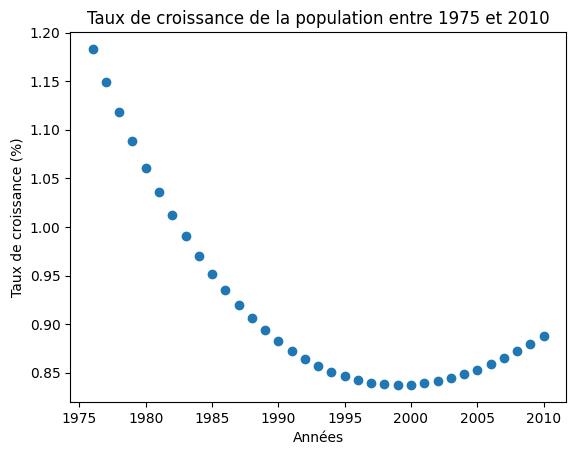

In [43]:
plot_taux_croissance(1975, 2010)

Ressources
----------

Dans la suite pour rechercher la documentation qui vous sera nécessaire pour réaliser le TP, utiliser les ressources suivantes : 

[Basiques de Pandas](http://nbviewer.ipython.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb)

[Tutoriel pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)